<a href="https://colab.research.google.com/github/aneeshmurali-n/Machine-Learning-for-U.S.-Car-Market-and-Pricing-Predictions/blob/main/U_S_Car_Market_and_Pricing_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download Dataset

In [1]:
!wget https://github.com/aneeshmurali-n/Machine-Learning-for-U.S.-Car-Market-and-Pricing-Predictions/raw/refs/heads/main/CarPrice_Dataset.csv

--2024-10-21 17:44:52--  https://github.com/aneeshmurali-n/Machine-Learning-for-U.S.-Car-Market-and-Pricing-Predictions/raw/refs/heads/main/CarPrice_Dataset.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aneeshmurali-n/Machine-Learning-for-U.S.-Car-Market-and-Pricing-Predictions/refs/heads/main/CarPrice_Dataset.csv [following]
--2024-10-21 17:44:52--  https://raw.githubusercontent.com/aneeshmurali-n/Machine-Learning-for-U.S.-Car-Market-and-Pricing-Predictions/refs/heads/main/CarPrice_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26717 (26K) [text/plain]
Saving to: ‘CarPrice_Da

#Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, boxcox
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

#Loading and Preprocessing
 * Load the dataset and perform necessary preprocessing steps.

In [3]:
df = pd.read_csv('CarPrice_Dataset.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape # df size

(205, 26)

In [5]:
df.info() # df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe() #Descriptive Statistics of df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.duplicated().sum() # duplicated rows

0

In [8]:
obj_col = df.select_dtypes(include='object').columns.tolist() # make a list of object data column names
print(obj_col)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


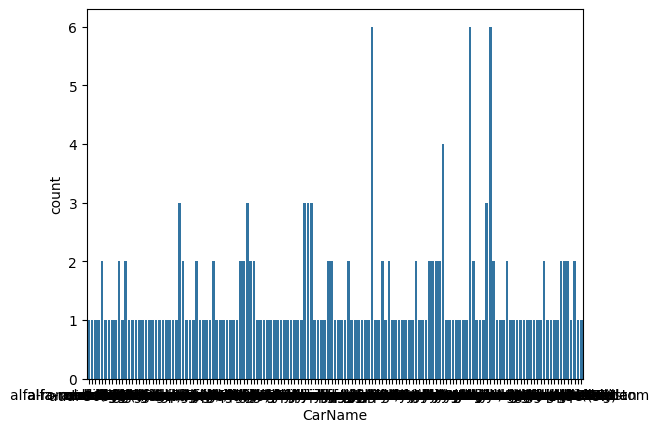

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64



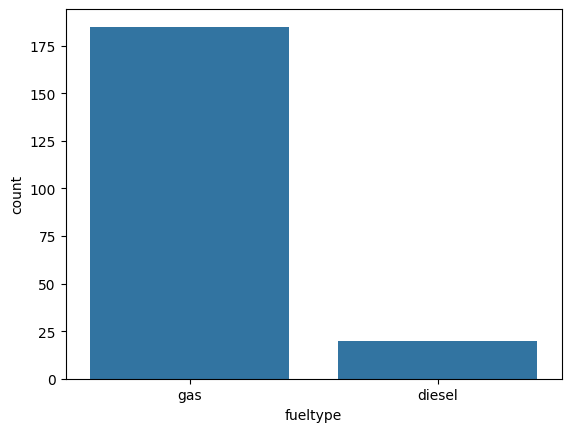

fueltype
gas       185
diesel     20
Name: count, dtype: int64



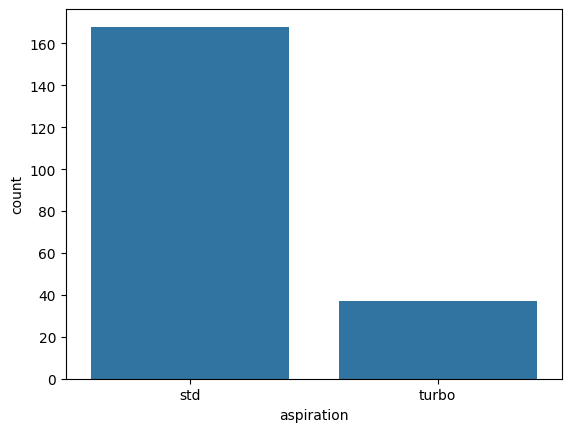

aspiration
std      168
turbo     37
Name: count, dtype: int64



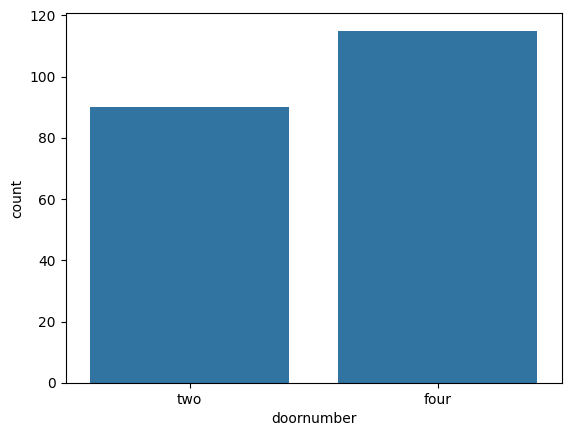

doornumber
four    115
two      90
Name: count, dtype: int64



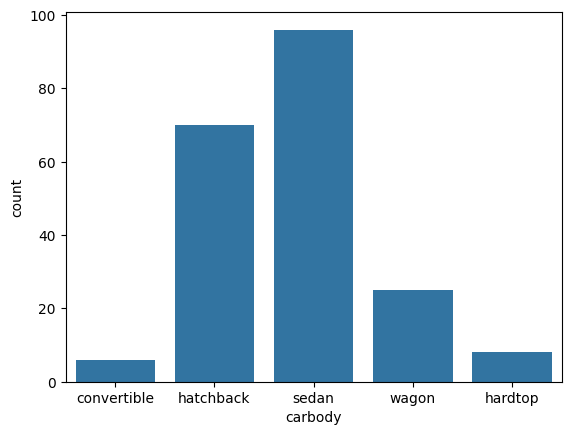

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64



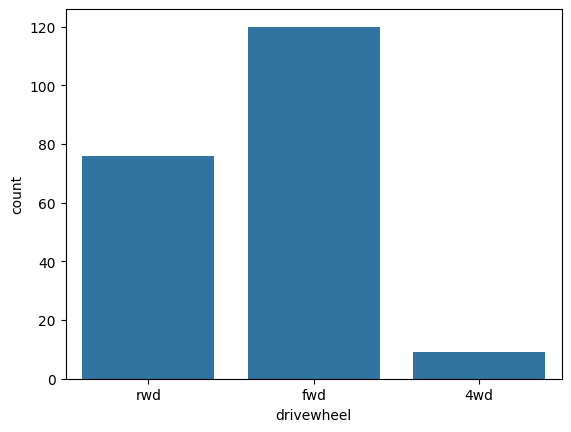

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64



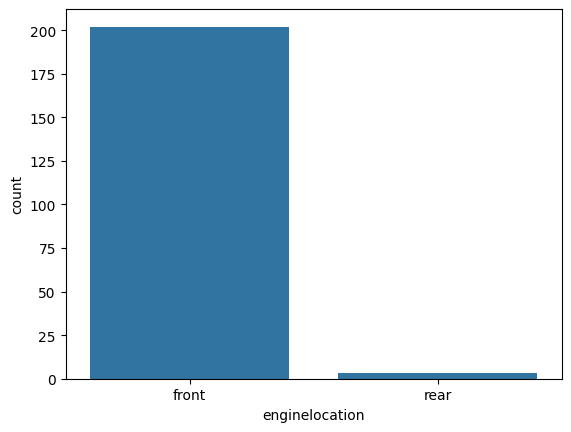

enginelocation
front    202
rear       3
Name: count, dtype: int64



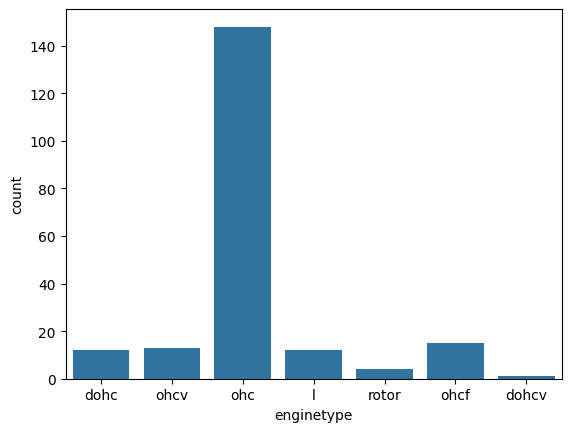

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64



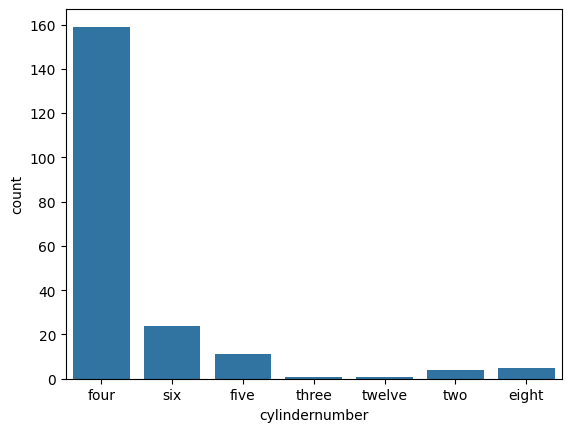

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64



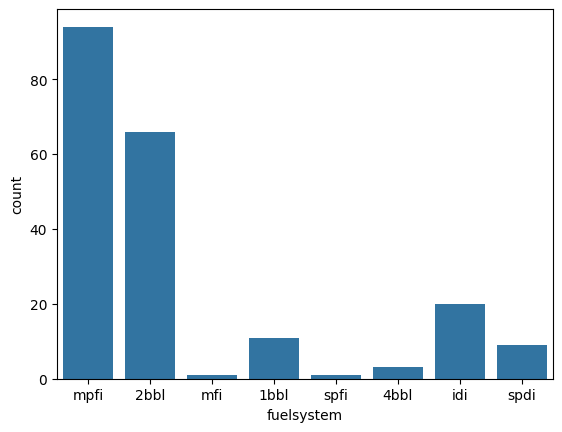

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64



In [9]:
for col in obj_col:
    sns.countplot(x=col, data=df)
    plt.show()
    print(f'{df[col].value_counts()}\n')

## Detect and handle outliers

In [10]:
num_col = df.select_dtypes(include='number').columns.tolist() # make a list of number data column names
print(num_col)


['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


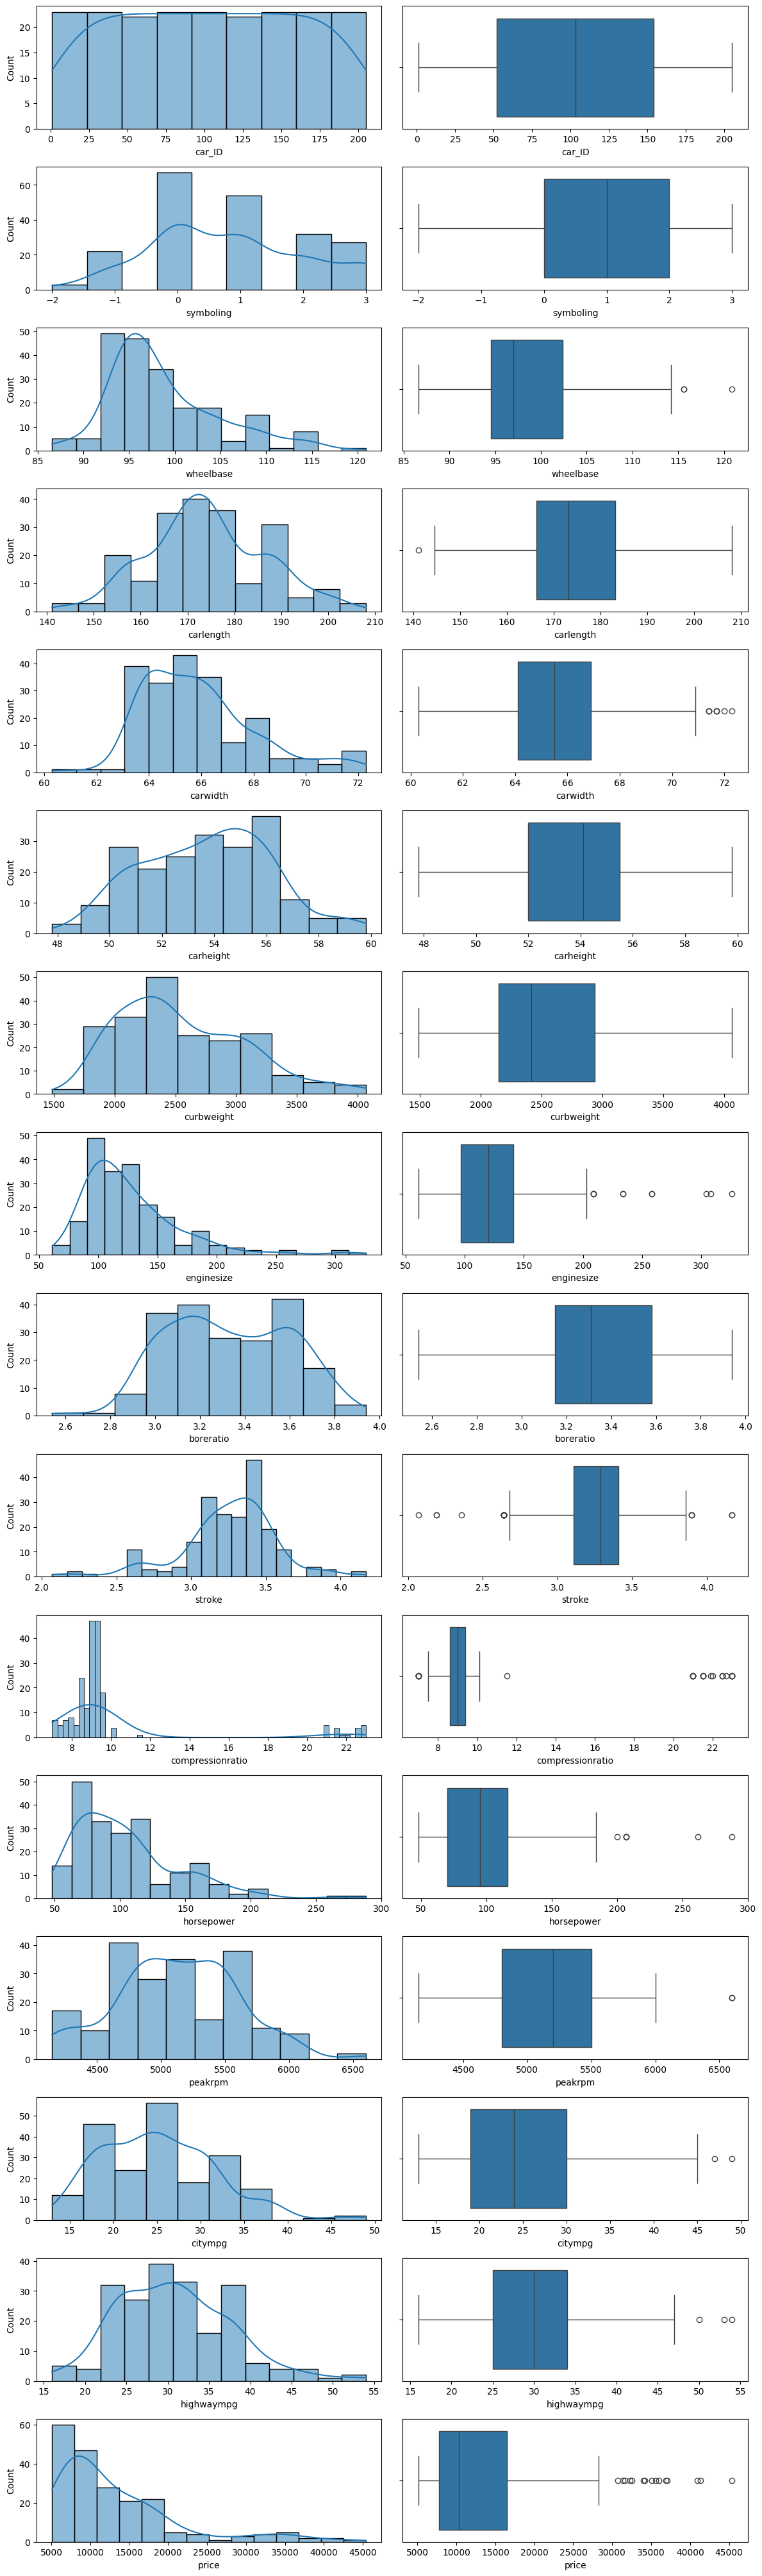

In [11]:
# Plot hist and box together before handling outliers
plt.figure(figsize=(12,80))
col_index = 0
for col in num_col:
    col_index += 1
    plt.subplot(32,2,col_index)
    sns.histplot(x=df[col], kde=True)
    col_index += 1
    plt.subplot(32,2,col_index)
    sns.boxplot(x=df[col])
    plt.tight_layout()
plt.show()

In [12]:
print(num_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [13]:
handle_col = ['wheelbase','carlength','carwidth','enginesize','stroke','compressionratio','horsepower','peakrpm', 'citympg', 'highwaympg','price'] #colums had outliers

In [14]:
# check skew and decide outlier handle methods and make a list of column names
handle_col_with_zscore = []
handle_col_with_iqr = []
for col in handle_col:
    if df[col].skew() > 0.1 or df[col].skew() < -0.1: # IQR
        handle_col_with_iqr.append(col)
    else:                                             # zscore
        handle_col_with_zscore.append(col)
print('handle this with zscore:',handle_col_with_zscore)
print('handle this with IQR:',handle_col_with_iqr)


handle this with zscore: ['peakrpm']
handle this with IQR: ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'price']


In [15]:
ndf = df.copy() # make a  df copy

In [16]:
# handle outliers with IQR
for col in handle_col_with_iqr:
    print(f'column name: {col}')
    print('skew before :',ndf[col].skew())
    print('describe before:',ndf[col].describe())
    print('shape before:',ndf.shape)
    Q1 = ndf[col].quantile(0.25)
    Q3 = ndf[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (ndf[col] < lower_bound) | (ndf[col] > upper_bound)
    print('outlier count:', ndf[outliers_mask].shape[0])
    ndf[col] = np.where(ndf[col] > upper_bound, upper_bound, np.where(ndf[col] < lower_bound, lower_bound, ndf[col]))
    print('skew after :',ndf[col].skew())
    print('describe after:',ndf[col].describe())
    print(f'shape after:{ndf.shape}\n')

column name: wheelbase
skew before : 1.0502137758714858
describe before: count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64
shape before: (205, 26)
outlier count: 3
skew after : 0.9249160965378501
describe after: count    205.000000
mean      98.710976
std        5.882586
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      114.250000
Name: wheelbase, dtype: float64
shape after:(205, 26)

column name: carlength
skew before : 0.1559537713215604
describe before: count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64
shape before: (205, 26)
outlier count: 1
skew after : 0.15595377132156063
describe after: count    205.000000
mean     174.049268
std       12.337289
min      141.100

In [17]:
# handle outliers in the peakrpm column with zscore
print('skew before :', ndf['peakrpm'].skew())
print('describe before:',ndf['peakrpm'].describe())
print('shape before:',ndf.shape)
z_score = zscore(ndf['peakrpm'])
outlier_mask = np.abs(z_score)>3
print('outlier count:', ndf[outlier_mask].shape[0])
upper_bound = ndf['peakrpm'][~outlier_mask].max()
lower_bound = ndf['peakrpm'][~outlier_mask].min()
ndf['peakrpm'] = np.where(ndf['peakrpm'] > upper_bound, upper_bound, np.where(ndf['peakrpm'] < lower_bound, lower_bound, ndf['peakrpm']))
print('skew after :',ndf['peakrpm'].skew())
print('describe after:',ndf['peakrpm'].describe())
print('shape after:',ndf.shape)

skew before : 0.07515872237118956
describe before: count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64
shape before: (205, 26)
outlier count: 2
skew after : -0.13353547753348094
describe after: count     205.000000
mean     5119.268293
std       462.232383
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6000.000000
Name: peakrpm, dtype: float64
shape after: (205, 26)


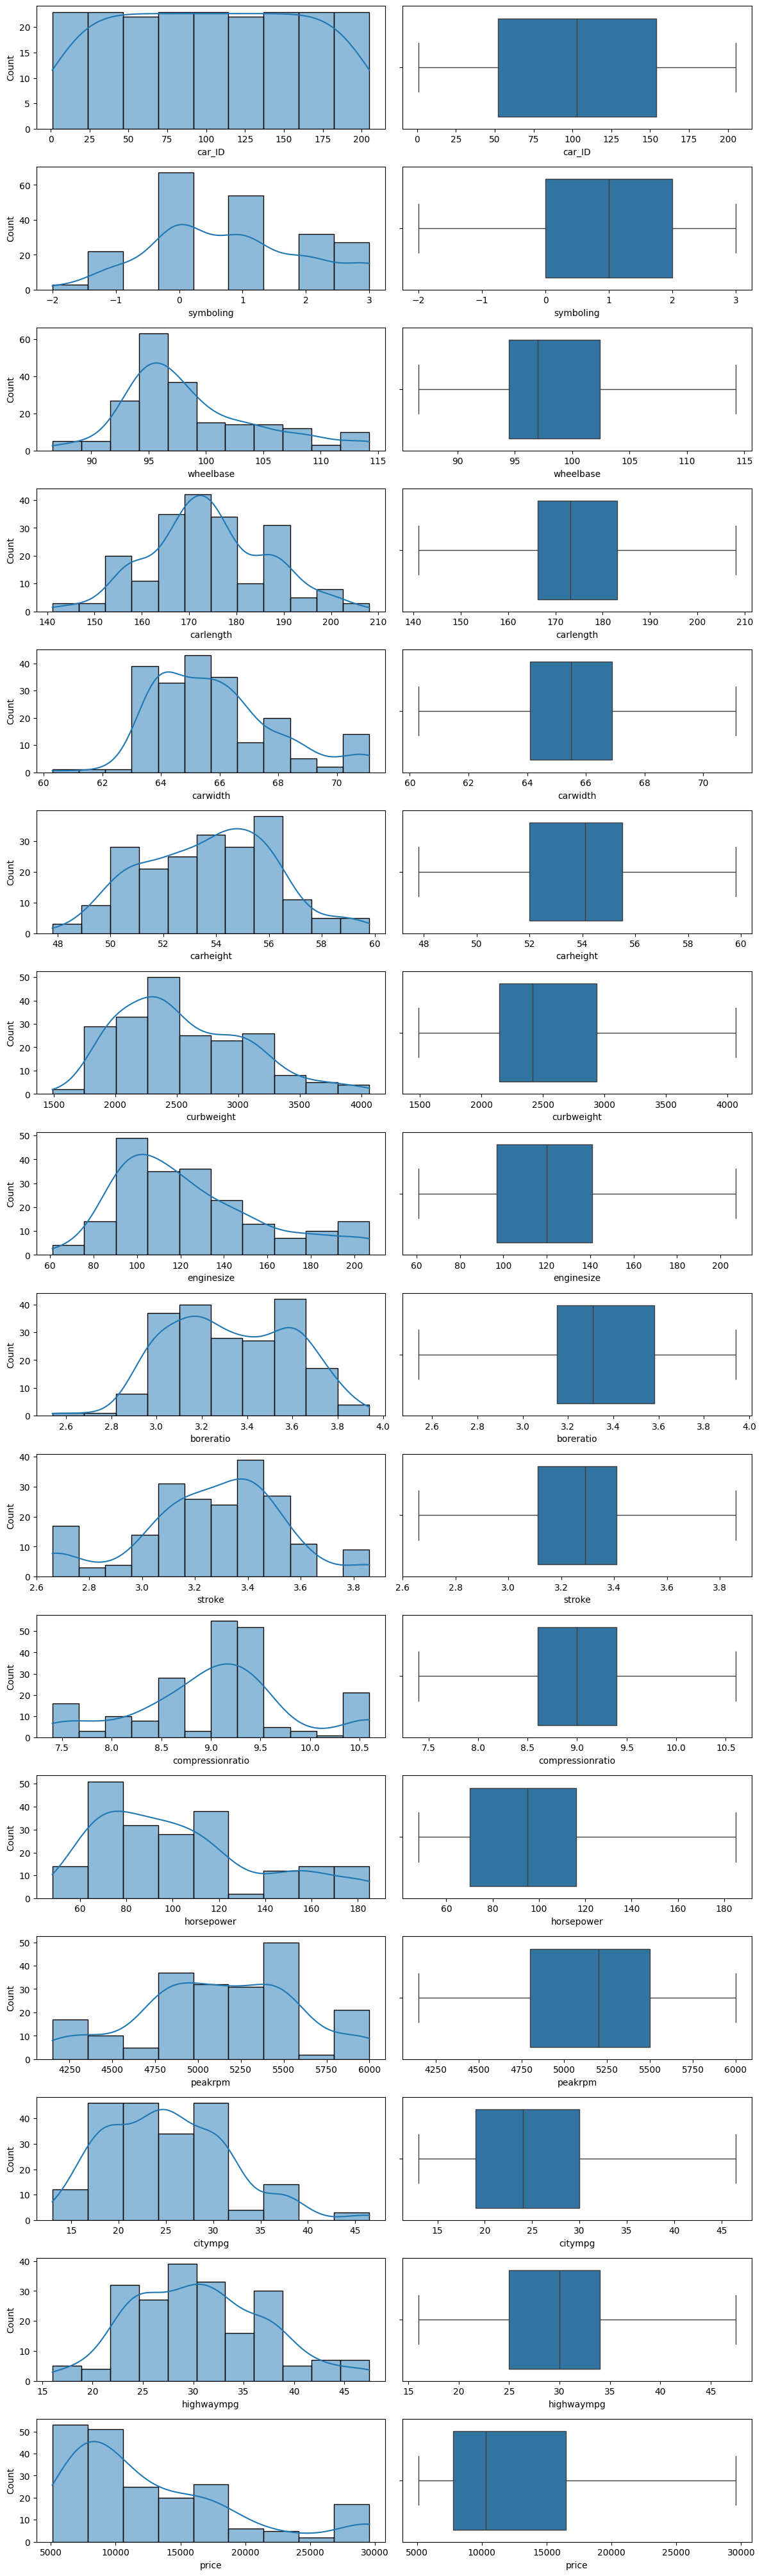

In [18]:
# Plot hist and box together after handling outliers
plt.figure(figsize=(12,80))
col_index = 0
for col in num_col:
    col_index += 1
    plt.subplot(32,2,col_index)
    sns.histplot(x=ndf[col], kde=True)
    col_index += 1
    plt.subplot(32,2,col_index)
    sns.boxplot(x=ndf[col])
    plt.tight_layout()
plt.show()

In [19]:
# make a list of columns to perform Transform
col_to_transform = ['wheelbase', 'curbweight', 'enginesize','compressionratio', 'horsepower', 'citympg', 'highwaympg']

In [20]:
# log Transform
for col in col_to_transform:
    ndf[col] = np.log1p(ndf[col])

In [21]:
# Boxcox Transform
#lambda_optimal_for_each_col = {}
#for col in col_to_transform:
 #   ndf[col], lambda_optimal_values = boxcox(ndf[col])
  #  lambda_optimal_for_each_col[col] = lambda_optimal_values
   # print(f'lambda optimal for {col} is {lambda_optimal_values}')

In [22]:
ndf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,4.600597,174.049268,65.884390,53.724878,7.826632,4.799208,3.329756,3.261805,2.303358,4.588185,5119.268293,3.235936,3.433327,12831.310571
std,59.322565,1.245307,0.057660,12.337289,2.083114,2.443522,0.197879,0.256114,0.270844,0.276855,0.079557,0.327749,462.232383,0.245831,0.213590,6716.631714
min,1.000000,-2.000000,4.472781,141.100000,60.300000,47.800000,7.305860,4.127134,2.540000,2.660000,2.128232,3.891820,4150.000000,2.639057,2.833213,5118.000000
25%,52.000000,0.000000,4.559126,166.300000,64.100000,52.000000,7.671361,4.584967,3.150000,3.110000,2.261763,4.262680,4800.000000,2.995732,3.258097,7788.000000
50%,103.000000,1.000000,4.584967,173.200000,65.500000,54.100000,7.789455,4.795791,3.310000,3.290000,2.302585,4.564348,5200.000000,3.218876,3.433987,10295.000000
75%,154.000000,2.000000,4.638605,183.100000,66.900000,55.500000,7.984803,4.955827,3.580000,3.410000,2.341806,4.762174,5500.000000,3.433987,3.555348,16503.000000
max,205.000000,3.000000,4.747104,208.100000,71.100000,59.800000,8.310661,5.337538,3.940000,3.860000,2.451005,5.225747,6000.000000,3.860730,3.881564,29575.500000


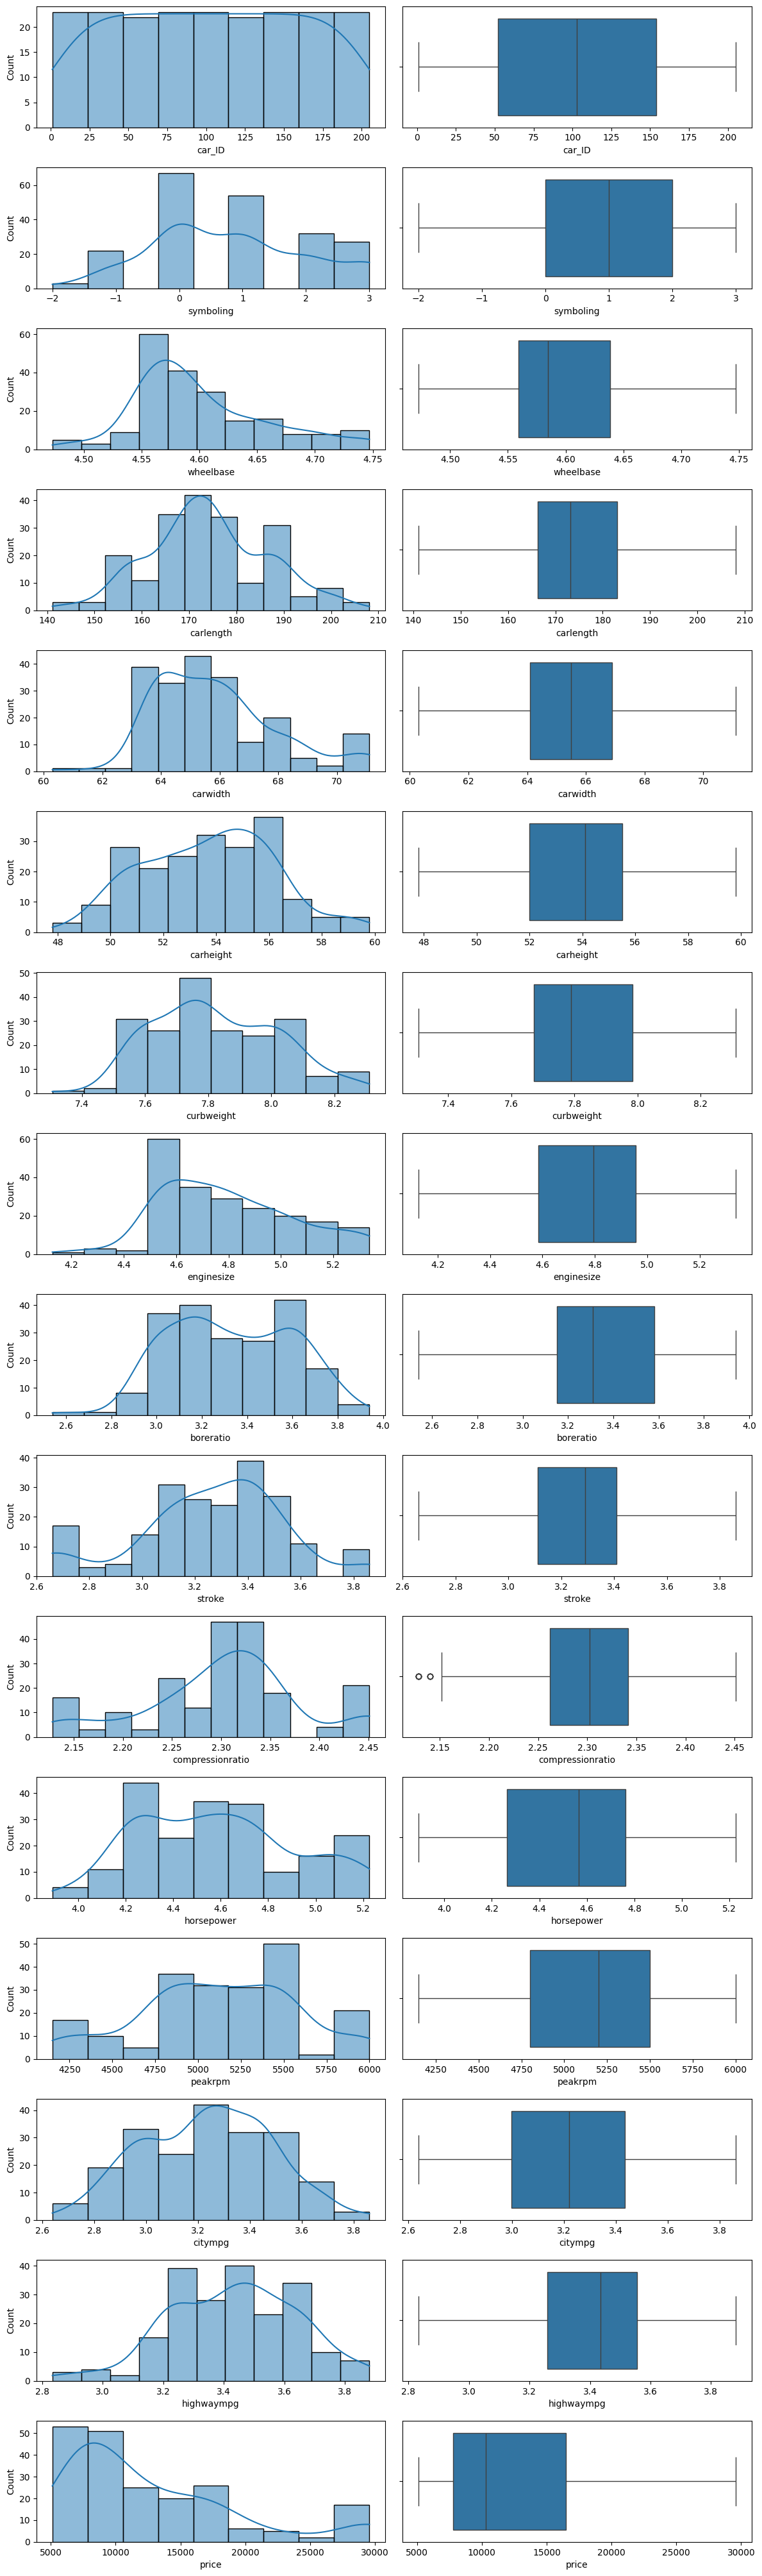

In [23]:
# Plot hist and box together after Transform excluding price
plt.figure(figsize=(12,80))
col_index = 0
for col in num_col:
    col_index += 1
    plt.subplot(32,2,col_index)
    sns.histplot(x=ndf[col], kde=True)
    col_index += 1
    plt.subplot(32,2,col_index)
    sns.boxplot(x=ndf[col])
    plt.tight_layout()
plt.show()

# Feature Importance Analysis
* Identify the significant variables affecting car prices (feature selection)

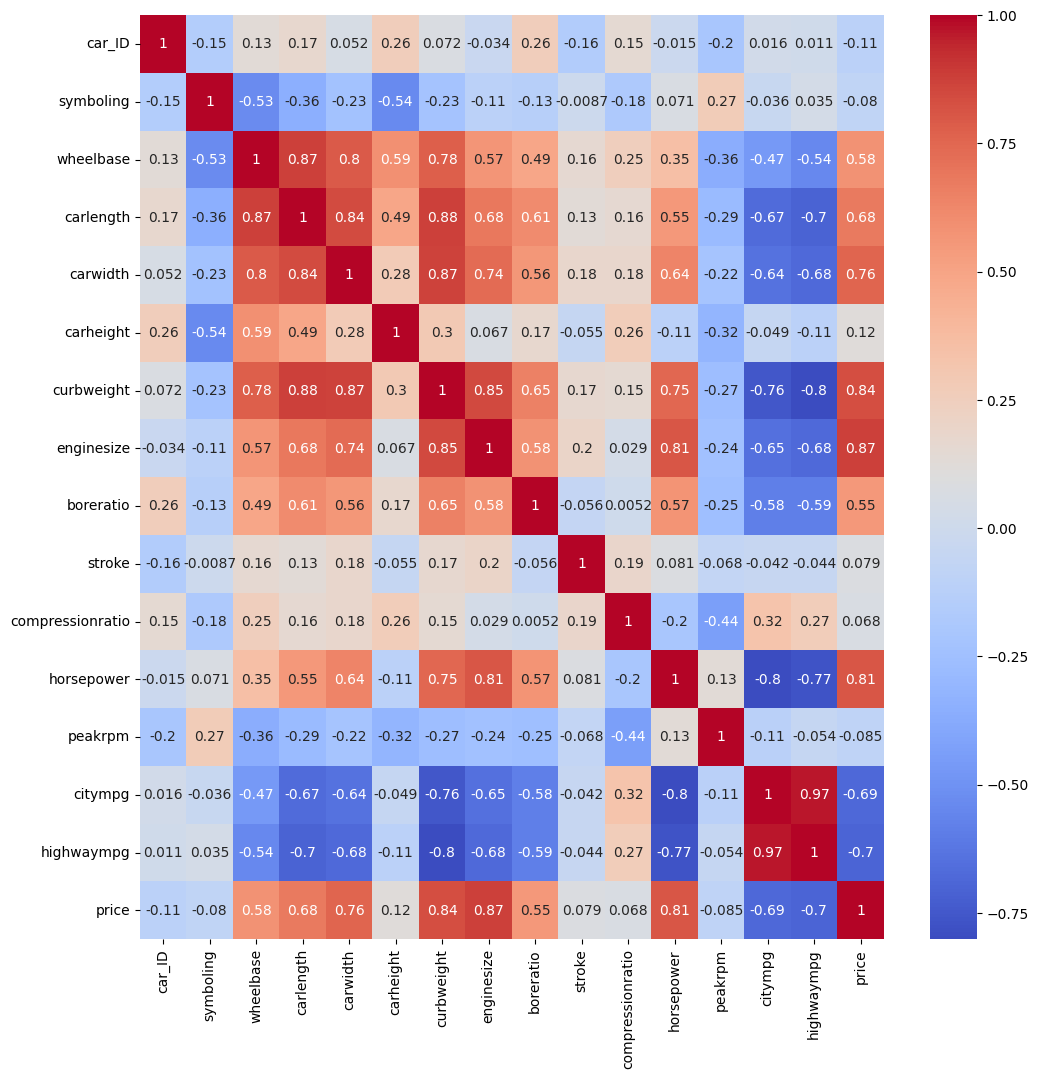

In [24]:
# correlation between numerical columns in original df
corr_matrix = df.select_dtypes(include = 'number').corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
print(df.select_dtypes(include='number').columns.tolist())

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


From the above heatmap, the best features to predict price are:<br> 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio', 'citympg'

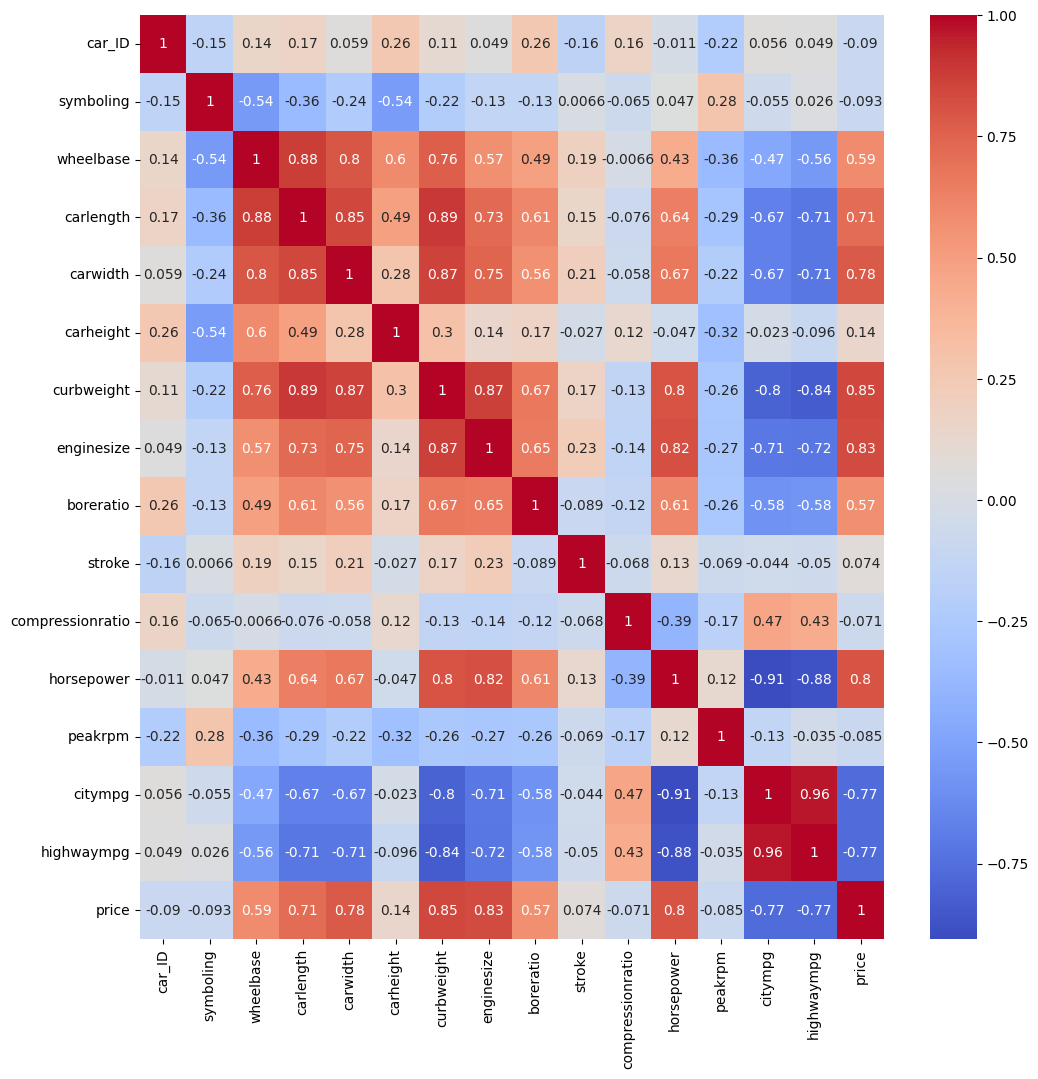

In [26]:
# correlation between numerical columns in ndf that is after transform
corr_matrix = ndf.select_dtypes(include = 'number').corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

From the above heatmap, the best features to predict car price are:<br> 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio', 'citympg', 'highwaympg'

In [27]:
ndf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,4.495355,...,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,3.091042,3.332205,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,4.495355,...,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,3.091042,3.332205,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,4.559126,...,5.030438,mpfi,2.68,3.47,2.302585,5.043425,5000,2.995732,3.295837,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,4.613138,...,4.700480,mpfi,3.19,3.40,2.397895,4.634729,5500,3.218876,3.433987,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,4.609162,...,4.919981,mpfi,3.19,3.40,2.197225,4.753590,5500,2.944439,3.135494,17450.0


In [28]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    float64
 1

In [29]:
print('Catogorical columns:\n',ndf.select_dtypes(include='object').columns.tolist())

Catogorical columns:
 ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [30]:
print('Numerical columns:\n',ndf.select_dtypes(include='number').columns.tolist())

Numerical columns:
 ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [31]:
# Drop unnecessary columns
ndf.drop(['car_ID','symboling','CarName'], axis=1, inplace=True)

In [32]:
ndf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,4.495355,168.8,64.1,48.8,...,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,3.091042,3.332205,13495.0
1,gas,std,two,convertible,rwd,front,4.495355,168.8,64.1,48.8,...,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,3.091042,3.332205,16500.0
2,gas,std,two,hatchback,rwd,front,4.559126,171.2,65.5,52.4,...,5.030438,mpfi,2.68,3.47,2.302585,5.043425,5000,2.995732,3.295837,16500.0
3,gas,std,four,sedan,fwd,front,4.613138,176.6,66.2,54.3,...,4.700480,mpfi,3.19,3.40,2.397895,4.634729,5500,3.218876,3.433987,13950.0
4,gas,std,four,sedan,4wd,front,4.609162,176.6,66.4,54.3,...,4.919981,mpfi,3.19,3.40,2.197225,4.753590,5500,2.944439,3.135494,17450.0


In [33]:
ndf.shape

(205, 23)

In [34]:
print('Catogorical columns:\n',ndf.select_dtypes(include='object').columns.tolist())

Catogorical columns:
 ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [35]:
# categorical variables
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [36]:
# One-hot encoding for categorical variables and make new encoded df
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(ndf[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_cols), index = ndf.index)
df_encoded = pd.concat( [ndf.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [37]:
df_encoded.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,4.495355,168.8,64.1,48.8,7.843456,4.875197,3.47,2.68,2.302585,4.718499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.495355,168.8,64.1,48.8,7.843456,4.875197,3.47,2.68,2.302585,4.718499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.559126,171.2,65.5,52.4,7.945910,5.030438,2.68,3.47,2.302585,5.043425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.613138,176.6,66.2,54.3,7.757051,4.700480,3.19,3.40,2.397895,4.634729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.609162,176.6,66.4,54.3,7.946264,4.919981,3.19,3.40,2.197225,4.753590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    float64
 5   enginesize             205 non-null    float64
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    float64
 10  peakrpm                205 non-null    int64  
 11  citympg                205 non-null    float64
 12  highwaympg             205 non-null    float64
 13  price                  205 non-null    float64
 14  fueltype_diesel        205 non-null    float64
 15  fuelty

In [39]:
# colors to highlight important features in the heatmap
color = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#000000", "#000000", "#000000", "#000000",
    "#ffbb78", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2",
    "#f5b041"
]

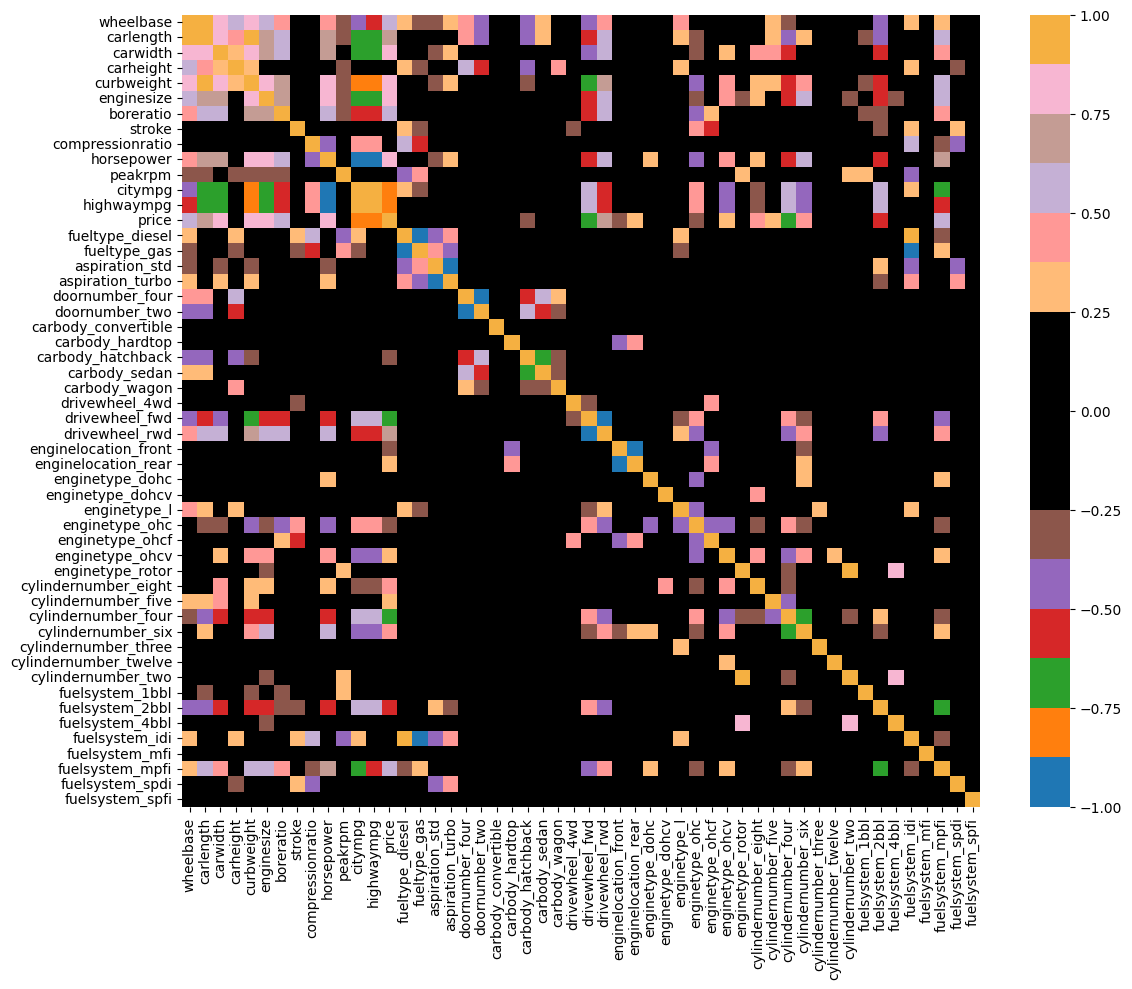

In [40]:
# whole column correlation after encoding
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap=color)
plt.tight_layout()
plt.show()

### The significant variables predicting the price of a car according to the heatmap are:
####Key Variables with Strong Positive Correlation:
* Curbweight: Heavier cars generally cost more, indicating that weight
plays a big role in determining car price.<br>
* Enginesize: Larger engines are associated with higher prices, likely due to increased power and performance.<br>
* Horsepower: More horsepower often correlates with higher-priced, more powerful cars.<br>
* Carwidth: Wider cars tend to be more expensive, possibly linked to larger and more premium models.<br>
* Carlength: Similar to width, longer cars are often more expensive.<br>

####Key Variables with Strong Negative Correlation:
* Highway MPG and City MPG: Fuel-efficient cars tend to be less expensive, likely because high-end cars prioritize performance over fuel efficiency.<br>
* Cylindernumber_four: Cars with smaller engines (like four cylinders) tend to be cheaper, while more cylinders (e.g., six or eight) generally increase the price.<br>
* Drivewheel_fwd: Front-wheel-drive cars are often less expensive than rear-wheel-drive ones.<br>

####Summary of Key Variables:
The engine size, weight, and horsepower are strong predictors of car price.<br>
Fuel efficiency (both highway and city) has a negative relationship with car price, as fuel-efficient cars are often lower in price.<br>
Larger engines and heavier cars are generally more expensive.
Higher horsepower is associated with higher prices.
Fuel-efficient cars tend to be less expensive.
Cars with smaller engines (e.g., four cylinders) and front-wheel drive are often cheaper.


### SelectKBest

In [41]:
print(categorical_cols)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [42]:
tuple(categorical_cols)

('fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem')

In [43]:
print(num_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [44]:
df_encoded.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsy

In [45]:
# Separate numerical features
numerical_features = df_encoded[[col for col in df_encoded.columns if col in num_col and col != 'price']]
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    float64
 5   enginesize        205 non-null    float64
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    float64
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    float64
 12  highwaympg        205 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 20.9 KB


In [46]:
# Separate categorical features
categorical_features = df_encoded[[col for col in df_encoded.columns if col.startswith(tuple(categorical_cols))]]
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fueltype_diesel        205 non-null    float64
 1   fueltype_gas           205 non-null    float64
 2   aspiration_std         205 non-null    float64
 3   aspiration_turbo       205 non-null    float64
 4   doornumber_four        205 non-null    float64
 5   doornumber_two         205 non-null    float64
 6   carbody_convertible    205 non-null    float64
 7   carbody_hardtop        205 non-null    float64
 8   carbody_hatchback      205 non-null    float64
 9   carbody_sedan          205 non-null    float64
 10  carbody_wagon          205 non-null    float64
 11  drivewheel_4wd         205 non-null    float64
 12  drivewheel_fwd         205 non-null    float64
 13  drivewheel_rwd         205 non-null    float64
 14  enginelocation_front   205 non-null    float64
 15  engine

In [47]:
# Target variable
y = df_encoded['price']

# Feature selection for numerical features, Select top numerical features
selector_num = SelectKBest(f_regression, k=8)
X_new_num = selector_num.fit_transform(numerical_features, y)
selected_num_features = numerical_features.columns[selector_num.get_support()]

# Feature selection for categorical features, Select top categorical features
selector_cat = SelectKBest(mutual_info_regression, k=8)
X_new_cat = selector_cat.fit_transform(categorical_features, y)
selected_cat_features = categorical_features.columns[selector_cat.get_support()]

# Combine selected features
selected_features = list(selected_num_features) + list(selected_cat_features)
selected_featur_df = df_encoded[selected_features]

print("Selected Features:", selected_features)

Selected Features: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'carbody_hatchback', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc', 'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_mpfi']


In [48]:
selected_featur_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,carbody_hatchback,drivewheel_fwd,drivewheel_rwd,enginetype_ohc,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi
0,4.495355,168.8,64.1,7.843456,4.875197,4.718499,3.091042,3.332205,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,4.495355,168.8,64.1,7.843456,4.875197,4.718499,3.091042,3.332205,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,4.559126,171.2,65.5,7.945910,5.030438,5.043425,2.995732,3.295837,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4.613138,176.6,66.2,7.757051,4.700480,4.634729,3.218876,3.433987,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,4.609162,176.6,66.4,7.946264,4.919981,4.753590,2.944439,3.135494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Scale

In [49]:
print(num_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [50]:
x_to_scale = [col for col in selected_featur_df if col in num_col]
x_to_scale

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

In [51]:
x_not_to_scale = [col for col in selected_featur_df if col not in num_col]
x_not_to_scale

['carbody_hatchback',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_ohc',
 'cylindernumber_four',
 'cylindernumber_six',
 'fuelsystem_2bbl',
 'fuelsystem_mpfi']

In [52]:
# Performing standard scaling on unencoded columns
scaler = StandardScaler()
scaled_x = scaler.fit_transform(selected_featur_df[x_to_scale])
scaled_xdf = pd.DataFrame(scaled_x, columns = x_to_scale, index = selected_featur_df.index)

In [53]:
scaled_xdf

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
0,-1.829669,-0.426521,-0.858695,0.085230,0.297426,0.398577,-0.590847,-0.474602
1,-1.829669,-0.426521,-0.858695,0.085230,0.297426,0.398577,-0.590847,-0.474602
2,-0.720983,-0.231513,-0.184978,0.604253,0.905047,1.392392,-0.979502,-0.645287
3,0.218041,0.207256,0.151880,-0.352496,-0.386427,0.142359,-0.069570,0.003099
4,0.148914,0.207256,0.248125,0.606047,0.472712,0.505907,-1.188665,-1.397829
...,...,...,...,...,...,...,...,...
200,1.752319,1.198549,1.451189,0.830536,0.613016,0.479425,-0.236033,-0.309906
201,1.752319,1.198549,1.403066,0.994268,0.613016,1.508555,-0.979502,-0.822415
202,1.752319,1.198549,1.451189,0.932436,1.408464,0.969847,-1.188665,-1.198083
203,1.752319,1.198549,1.451189,1.265897,0.721747,0.258891,0.244261,-0.474602


In [54]:
# Joining the scaled DataFrame with the encoded columns
xdf = pd.concat([scaled_xdf, selected_featur_df[x_not_to_scale]], axis=1)

In [55]:
#xdf = selected_featur_df # Uncomment this code to bypass scaling

In [56]:
xdf # x final

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,carbody_hatchback,drivewheel_fwd,drivewheel_rwd,enginetype_ohc,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_mpfi
0,-1.829669,-0.426521,-0.858695,0.085230,0.297426,0.398577,-0.590847,-0.474602,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.829669,-0.426521,-0.858695,0.085230,0.297426,0.398577,-0.590847,-0.474602,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.720983,-0.231513,-0.184978,0.604253,0.905047,1.392392,-0.979502,-0.645287,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.218041,0.207256,0.151880,-0.352496,-0.386427,0.142359,-0.069570,0.003099,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.148914,0.207256,0.248125,0.606047,0.472712,0.505907,-1.188665,-1.397829,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.752319,1.198549,1.451189,0.830536,0.613016,0.479425,-0.236033,-0.309906,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
201,1.752319,1.198549,1.403066,0.994268,0.613016,1.508555,-0.979502,-0.822415,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
202,1.752319,1.198549,1.451189,0.932436,1.408464,0.969847,-1.188665,-1.198083,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
203,1.752319,1.198549,1.451189,1.265897,0.721747,0.258891,0.244261,-0.474602,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


# Model Implementation
####Implementing five regression algorithms:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* Support Vector Regressor

### Split the data into training and testing sets

In [57]:
x_train, x_test, y_train, y_test = train_test_split(xdf, y, test_size=0.2, random_state=42) # y = df_encoded['price']

### Fit models



In [58]:
# Create dictionary to store the models
models = {
    'Linear Regression          ': LinearRegression(),
    'Decision Tree Regressor    ': DecisionTreeRegressor(),
    'Random Forest Regressor    ': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor   ': SVR()
}

# loop through model dictionary and train each
for model_name, model in models.items():
    model.fit(x_train, y_train)
    print(f'Trained {model_name.strip()} Model')


Trained Linear Regression Model
Trained Decision Tree Regressor Model
Trained Random Forest Regressor Model
Trained Gradient Boosting Regressor Model
Trained Support Vector Regressor Model


#Model Evaluation

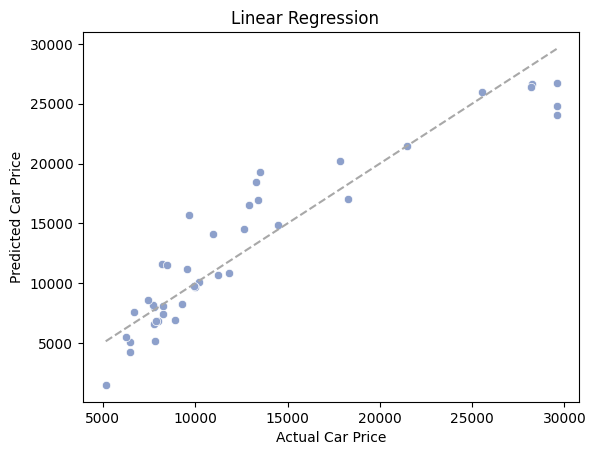

Linear Regression           :   MSE:6680248.94165877      MAE:1981.594670822673      R2:0.873866606638904
----------------------------------------------------------------------------------------------------


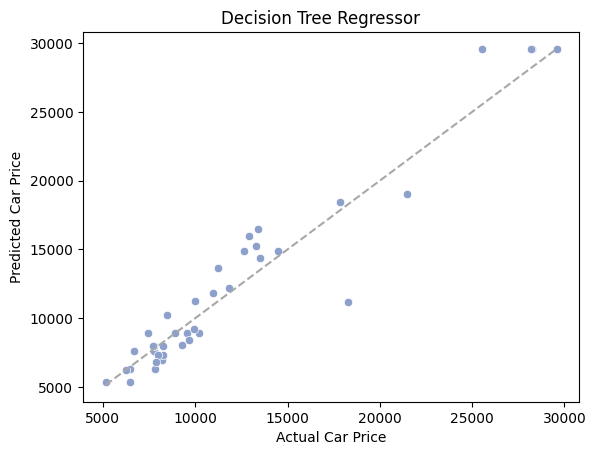

Decision Tree Regressor     :   MSE:3226975.25375339      MAE:1225.8129999999999      R2:0.9390697348851899
----------------------------------------------------------------------------------------------------


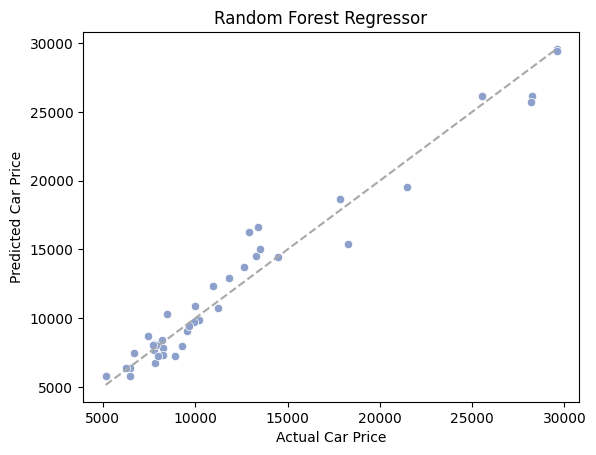

Random Forest Regressor     :   MSE:1663145.4978178013      MAE:954.8866991869919      R2:0.9685972503232942
----------------------------------------------------------------------------------------------------


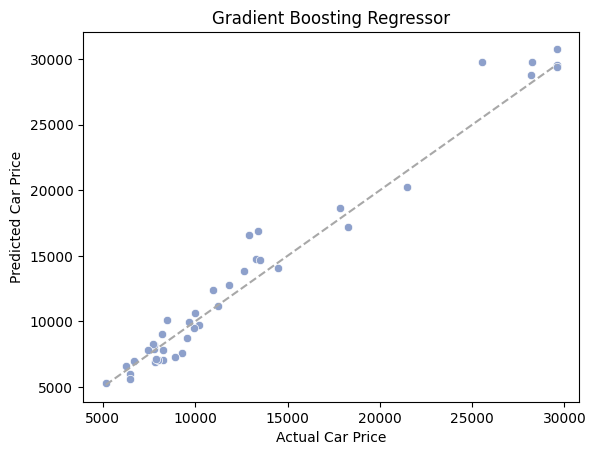

Gradient Boosting Regressor :   MSE:1833180.6738187482      MAE:1000.3591482629957      R2:0.9653867241996338
----------------------------------------------------------------------------------------------------


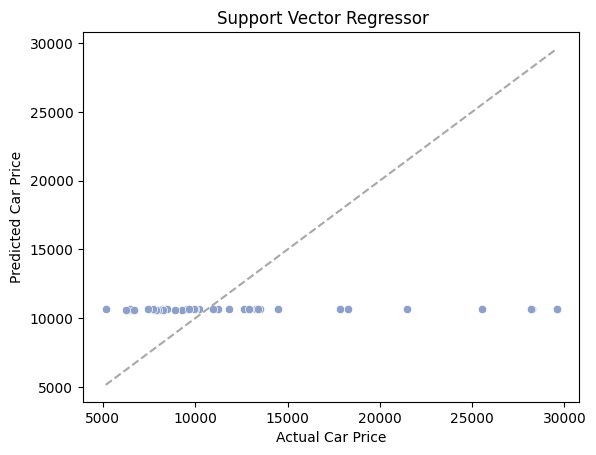

Support Vector Regressor    :   MSE:57702207.395771466      MAE:5093.929740729041      R2:-0.0895065867780589
----------------------------------------------------------------------------------------------------


In [59]:
# Loop through model dictionary and evaluate each
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    plt.title(model_name)
    sns.scatterplot(x=y_test, y=y_pred , color='#8da0cb')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#a8a8a8')
    plt.xlabel('Actual Car Price')
    plt.ylabel('Predicted Car Price')
    plt.show()
    print(f'{model_name} :   MSE:{mse}      MAE:{mae}      R2:{r2}')
    print('-'*100)


#  

#Hyperparameter Tuning
* Perform hyperparameter tuning and check whether the performance of the model has increased.

In [60]:
# hyperparameter grids for each model
param_grids = {
        'Linear Regression          ': {},
        'Decision Tree Regressor    ':
         {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
         },

        'Random Forest Regressor    ':
         {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
         },
        'Gradient Boosting Regressor':
         {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
         },
        'Support Vector Regressor   ':
         {
            'C': [0.1, 1, 10, 100],  # Regularization parameter (inverse of strength)
            'kernel': ['linear', 'rbf', 'poly'],  # Kernel type (linear, radial basis function, polynomial)
            'epsilon': [0.01, 0.1, 0.5]  # Insensitivity zone width (for epsilon-SVR)
        }
 }

In [61]:
print(param_grids)

{'Linear Regression          ': {}, 'Decision Tree Regressor    ': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}, 'Random Forest Regressor    ': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}, 'Gradient Boosting Regressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}, 'Support Vector Regressor   ': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'epsilon': [0.01, 0.1, 0.5]}}


In [62]:
best_models = {}  # Store the best models
for model_name, model in models.items():  # Use your existing 'models' dictionary
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_squared_error',cv=5, n_jobs=-1 )
    grid_search.fit(x_train, y_train)  # Fit GridSearchCV (refits the model)
    best_models[model_name] = grid_search.best_estimator_
    print(f'Tuned {model_name.strip()} Model')


Tuned Linear Regression Model
Tuned Decision Tree Regressor Model
Tuned Random Forest Regressor Model
Tuned Gradient Boosting Regressor Model
Tuned Support Vector Regressor Model


## Model Evaluation after Hyperparameter Tuning

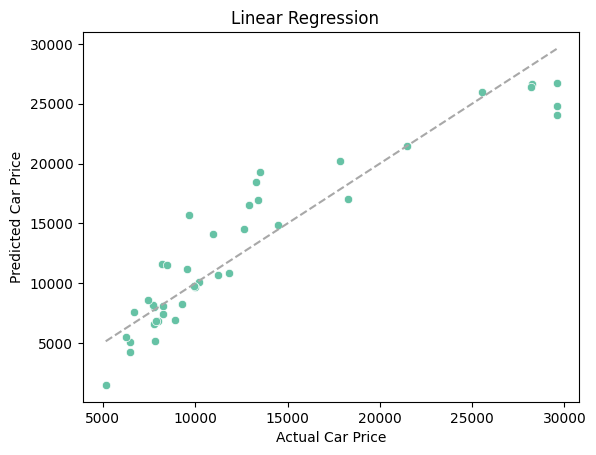

Linear Regression           :   MSE:6680248.94165877      MAE:1981.594670822673     R2:0.873866606638904
----------------------------------------------------------------------------------------------------


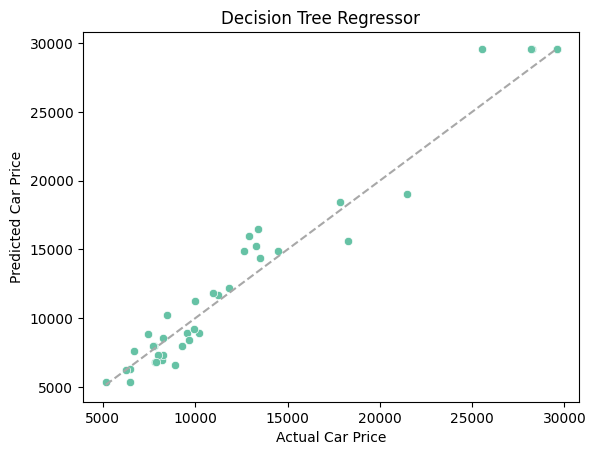

Decision Tree Regressor     :   MSE:2145534.50375339      MAE:1117.825195121951     R2:0.9594890025962817
----------------------------------------------------------------------------------------------------


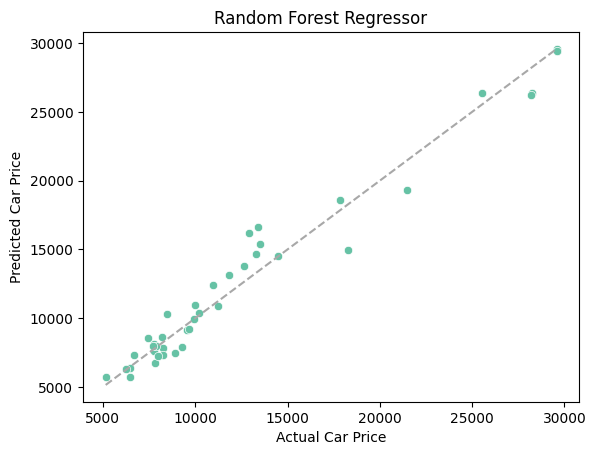

Random Forest Regressor     :   MSE:1717070.8756633      MAE:969.1425799457993     R2:0.967579056097999
----------------------------------------------------------------------------------------------------


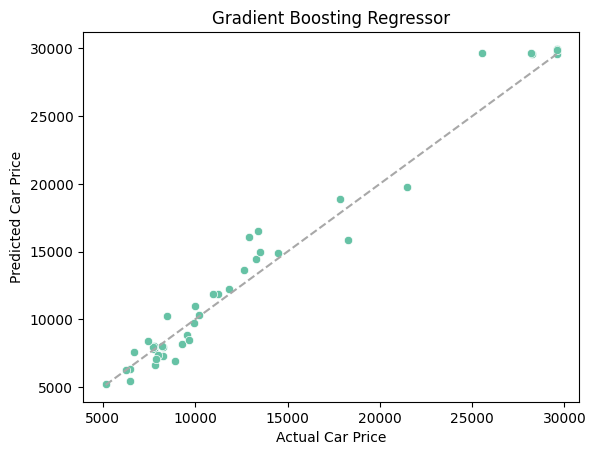

Gradient Boosting Regressor :   MSE:1801947.9609118933      MAE:993.3141584354915     R2:0.9659764459446196
----------------------------------------------------------------------------------------------------


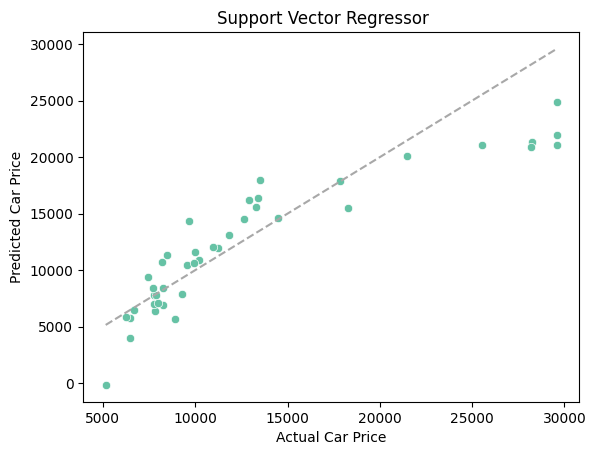

Support Vector Regressor    :   MSE:10541014.455902128      MAE:2361.6297744630438     R2:0.8009694048226358
----------------------------------------------------------------------------------------------------


In [63]:
# Loop through best_models dictionary and evaluate each
for model_name, model in best_models.items():
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        plt.title(model_name)
        sns.scatterplot(x=y_test, y=y_pred , color='#66c2a5')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#a8a8a8')
        plt.xlabel('Actual Car Price')
        plt.ylabel('Predicted Car Price')
        plt.show()
        print(f'{model_name} :   MSE:{mse}      MAE:{mae}     R2:{r2}')
        print('-'*100)

#Conclusion:
The Random Forest Regressor is the best-performing model overall based on all three metrics (R2, MSE, and MAE) both before and after hyperparameter tuning. It has the highest R2, meaning it explains the most variance in the target variable, and the lowest errors (MSE and MAE). Despite slight increases in MSE and MAE after tuning, the changes are minimal, and the model remains the top performer. The strong balance between low error and high predictive power makes it the best choice for this task.
* The Decision Tree Regressor significantly improved after tuning, with a reduction in errors and a higher R2.
* The Random Forest Regressor, tuning did not lead to performance improvement. In fact, there was a minor drop in performance, though the changes were small.
* The Support Vector Regressor saw a major improvement after hyperparameter tuning, with much lower errors and a far better R2 score, though its performance is still weaker than other models.
